# Minimisation d’une fonction de 2 variables : méthode du gradient et de Newton
 
### Objectifs de la séance :
- Mettre en oeuvre la recherche de minimum par la méthode du gradient à « pas fixe »
- Mettre en oeuvre la recherche de minimum par la méthode de Newton
- Analyser le comportement et les conditions de convergence de ces méthodes

Dans le but de ne pas trop charger le notebook, on pense qu'il est inutile de reprendre dans le CR, les pricipes des algorithmes utilisés, car ils le sont déja clairement expliqués dans le texte de TP. On essayera, par contre, d'analyser au mieux le comportement et les conditions de convergence de ces méthodes.

## Implantation de la méthode du gradient à pas fixe :


In [109]:
#%% Import des librairies
import numpy as np 
import matplotlib.pyplot as plt
import random

In [110]:
import TP3

Notation:
- `J`: Fonction test : $J(x_1,x_2) = x_1^2 + 1.5 \times x_2^2 - 5\times sin(2\times x1 + x2) + 5\times sin(x1 - x2)$
- `gradJ` : Gradient de `J` :  $\nabla J =  \frac{\partial J}{\partial x_1} \hat{\imath}+ \frac{\partial J}{\partial x_2}\hat{\jmath}$

Le programme suivant nous indique si la recherche de minimum a convergé, et si c'est le cas, nous donne le nombre d’itérations réalisées
et la solution approchée.

In [111]:
X0 = [0,3]  # Point de départ de l'algorithme
alpha = 0.071  # Pas de recherche
epsilon = 1e-3 # Critère de précision
nmax = 1000    # Nombre maximal d’itérations autorisé

# Appel de la fonction fixedStepGradient : 
XN, converge , n = TP3.fixedStepGradient(TP3.J, TP3.gradJ, X0 , alpha, epsilon, nmax)

if converge == True :  #indicateur booléen de convergence
    print("Point de départ : x0 = {:.4f} , {:.4f}".format( X0[0] , X0[1] ) )
    print("Convergance aprés {} itérations : xMIN = {} \n".format( n, XN[-1,:]))       
else:
    print("Point de départ : x0 = {:.4f} , {:.4f}".format( X0[0] , X0[1] ) )
    print("Divergeance !\n")   

Point de départ : x0 = 0.0000 , 3.0000
Convergance aprés 146 itérations : xMIN = [0.07590211 1.17096609] 



Exemple arbitraire : 
- A partir d'un point $x_0= [0,3]$ et pour une precision voulue de 1e-3 et alpha = 0.071 , la méthode converge vers une solution approchée, après 146 itérations.

Exemple cas limite :
* Après plusieurs essais on définit la limite convergence/divergence de la méthode pour un unique point de départ et une précision voulue, par le dépassement de alpha à une valeur d'environs 
- Avec : $x_0= [0,3]$ , epsilon =  1e-3 et alpha = 0.07220 , la méthode converge vers une solution approchée, après 987 itérations
- Avec : $x_0= [0,3]$ , epsilon =  1e-3 et alpha = 0.07221 , la méthode diverge.


### Affichage des isovaleurs et du chemain de recherche de minimum :

<IPython.core.display.Javascript object>


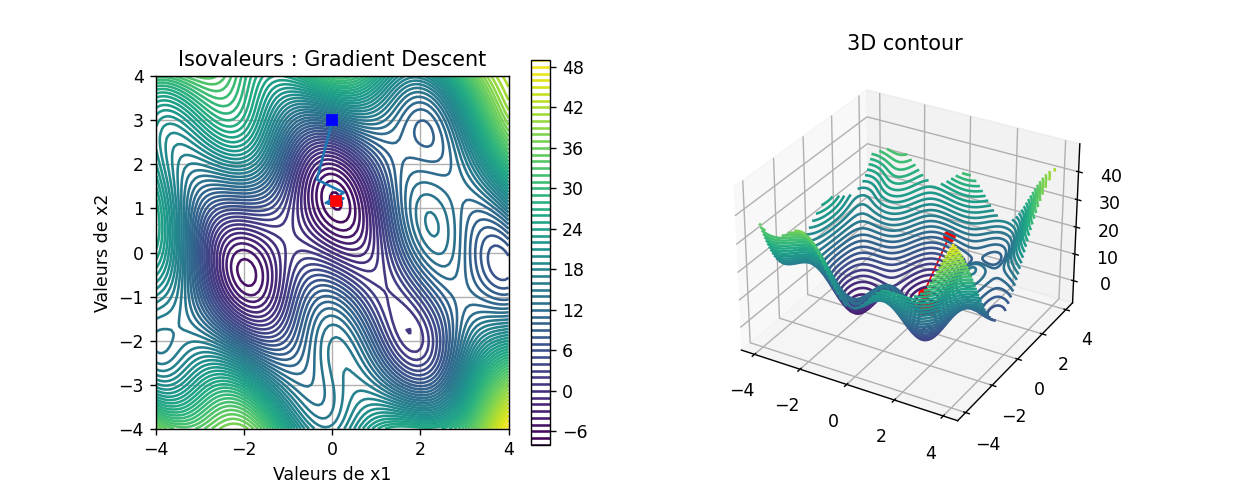

Text(0.5, 0.92, '3D contour')

In [112]:
%matplotlib notebook
#%% Tracés
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(121)

# Discrétisation du domaine de tracé
tab_x1  = np.linspace(-4,4,101)
tab_x2  = np.linspace(-4,4,101)
x1_2D, x2_2D = np.meshgrid(tab_x1, tab_x2)

# Tracé des isovaleurs 
nIso = 60
cp = ax1.contour(x1_2D, x2_2D, TP3.J(x1_2D, x2_2D), nIso)
plt.title('Isovaleurs : Gradient Descent')
plt.xlabel('Valeurs de x1')
plt.ylabel('Valeurs de x2')
plt.grid()
ax1.axis('square')
#plt.xlim([-1,1])
#plt.ylim([0.75,3.2])

fig.colorbar(cp)

# Tracé des segments
x1_values = np.array(XN[:,0])
x2_values = np.array(XN[:,1])
plt.plot(x1_values, x2_values)

# Tracé des points de départs et d'arrivés
plt.plot( XN[-1][0],XN[-1][1],'rs', label = 'x0')
plt.plot( XN[0][0],XN[0][1],'bs', label = 'xN')

ax2 = fig.add_subplot(122, projection = '3d')
ax2.contour3D(x1_2D, x2_2D, TP3.J(x1_2D, x2_2D) ,50 )
ax2.plot(XN[:,0],XN[:,1],TP3.J(XN[:,0], XN[:,1]), c ='r', marker='o',linewidth=1 )
ax2.set_title('3D contour')

#fig.colorbar(ax2, ax=ax2)


La figure de gauche représente les isovaleurs de J et le chemain emprunté pour la recherche du minimim.

La figure de droite represente les isovaleurs de la fonction test J en 3D ; elle nous permet de vérifié facilement la multiplicité des minimums locaux et la présence des points selles et un maximum.


   - En regardant ces deux représentation et leurs dimensions, on peut déja avoir une idée de quel grandeur nous pouvons prendre notre pas de recherche (alpha). La fonction évolue pas mal dans un espace relativement petit, pour eviter la divergence, un alpha tres petit sera nécessaire.
   
   - Par contre, il faudra noter que ne nombre d'itération augment d'autant que le pas de recherche diminue.




### Convergence de l’algorithme pour différentes valeurs de 𝛼 et différents points de départ :

Pour chaque alpha donné, on calcule est on affiche les résulats de convergence de la méthode de descente en gradient, appliquée à plusieurs points de départs.

In [113]:
#%% Tester l’algorithme pour différentes valeurs de 𝛼 et différents points de départ
#%matplotlib
nb_pointsAléatoires = 80
tab_alpha = np.linspace(0.04,0.09,4)

# Génération de nb_pointsAléatoires aléatoire pour le test de la fonction
randomlist_x1 = []
randomlist_x2 = []
for i in range(0,nb_pointsAléatoires):
    n1 = random.uniform(-4,4)
    n2 = random.uniform(-4,4)    
    randomlist_x1.append(n1)
    randomlist_x2.append(n2)

<IPython.core.display.Javascript object>


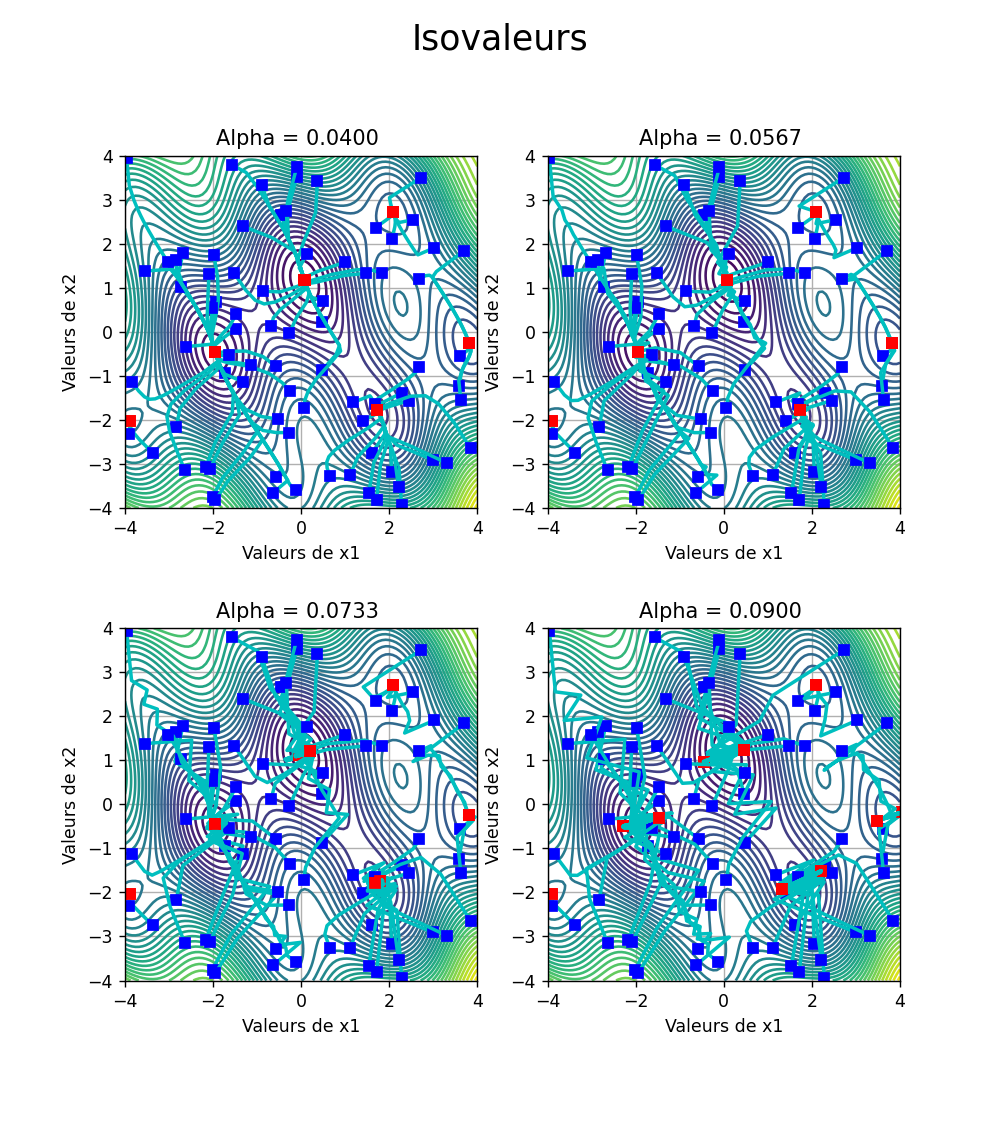

------------------     Calcul pour alpha = 0.0400   -------------------
Gradient Descent  à converger 80 fois /80 points de départs aléatoires

------------------     Calcul pour alpha = 0.0567   -------------------
Gradient Descent  à converger 80 fois /80 points de départs aléatoires

------------------     Calcul pour alpha = 0.0733   -------------------
Gradient Descent  à converger 43 fois /80 points de départs aléatoires

------------------     Calcul pour alpha = 0.0900   -------------------
Gradient Descent  à converger 6 fois /80 points de départs aléatoires



In [114]:
fig = plt.figure( figsize=(8, 9))
    
for j in range(len(tab_alpha)):     
    axi = fig.add_subplot(2,2, j+1)
    fig.suptitle('Isovaleurs' , fontsize=20)
    
    # Discrétisation du domaine de tracé
    tab_x1  = np.linspace(-4,4,101)
    tab_x2  = np.linspace(-4,4,101)
    x1_2D, x2_2D = np.meshgrid(tab_x1, tab_x2) 
    
    # Tracé des isovaleurs 
    nIso = 40
    axi.contour(x1_2D, x2_2D, TP3.J(x1_2D, x2_2D), nIso)
    plt.title("Alpha = {:.4f} ".format( tab_alpha[j] ))
    plt.xlabel('Valeurs de x1')
    plt.ylabel('Valeurs de x2')
    plt.grid() 
    plt.axis('square')
    # variable compant le nombre de fois la méthode à converger 
    cpt_point_convergant = 0
    
    print("------------------     Calcul pour alpha = {:.4f}   -------------------".format(tab_alpha[j]))
    for i in range(nb_pointsAléatoires) :  
          
        XN, converge , n = TP3.fixedStepGradient(TP3.J, TP3.gradJ, [randomlist_x1[i],randomlist_x2[i]], tab_alpha[j], 1e-3, 1000)
        
        if converge == True:
            cpt_point_convergant += 1
            #print("Point de départ : x0 = {:.4f} , {:.4f}".format( randomlist_x1[i] , randomlist_x2[i]) )
            #print("Convergeance vers xmin = {}, après : {} itérations\n".format(XN[-1,:], n))
        '''
        else:
            print("Point de départ : x0 = {:.4f} , {:.4f}".format( randomlist_x1[i] , randomlist_x2[i]) )
            print("Divergeance !\n")
        '''        
        # Tracé des segments
        x1_values = np.array(XN[:,0])
        x2_values = np.array(XN[:,1])
        axi.plot(x1_values, x2_values,'c', linewidth=2)
        # Tracé des points de départs et d'arrivé
        axi.plot( XN[-1][0],XN[-1][1],'rs',linewidth=7, label = 'x0')
        axi.plot( XN[0][0],XN[0][1],'bs',linewidth=7, label = 'xN')
    


    print("Gradient Descent  à converger {} fois /{} points de départs aléatoires\n".format(cpt_point_convergant, nb_pointsAléatoires))
    

- Marker blue   : Points de départs générés d'une façon aléatoires.
- Marker rouge : Points de convergence.

Par ces résulatats on vérifie notre limite de convergence/divergence (alpha = 0.07220).

La méthode converge vers les minimums les plus proches des points de calculs de départs

On remarche que lorsque alpha est plus grand que le threshold définit, l'algorithme n'est plus stable et oscille autour des sollutions.

Ce qu'on peut dire de la méthode de déscente en gradient c'est que le choix du pas de recherche dépends entierement de la forme de la fonction étudiée, d'un coté ; si la fonction est étendue dans notre espace et forme un grand plateau, le meilleur c'est de prendre un aplha plutot grand pour pouvoir s'en affranchir avec peu d'itérations.

Cependant, si dans notre espace de définition de la fonction évolue rapidement, alpha doit etre faible pour éviter cet effet escillatoire non convergant.

Ce qui pourrait améliorer cet algorithme, c'est l'adaptation du pas de recherche (alpha) au fur des itération.


## Descente en gradien à pas adaptatif : 

In [116]:
#L'iddée la partie code de l'adaptaion d'alpha :
''''
.
..
while J(xN1, xN2) > J(x1, x2):
        alpha = alpha/2
        xN1 = x1 - alpha*gradX1
        xN2 = x2 - alpha*gradX2
                
alpha = alpha * 2
.
..

'''

"'\n.\n..\nwhile J(xN1, xN2) > J(x1, x2):\n        alpha = alpha/2\n        xN1 = x1 - alpha*gradX1\n        xN2 = x2 - alpha*gradX2\n                \nalpha = alpha * 2\n.\n..\n\n"

<IPython.core.display.Javascript object>


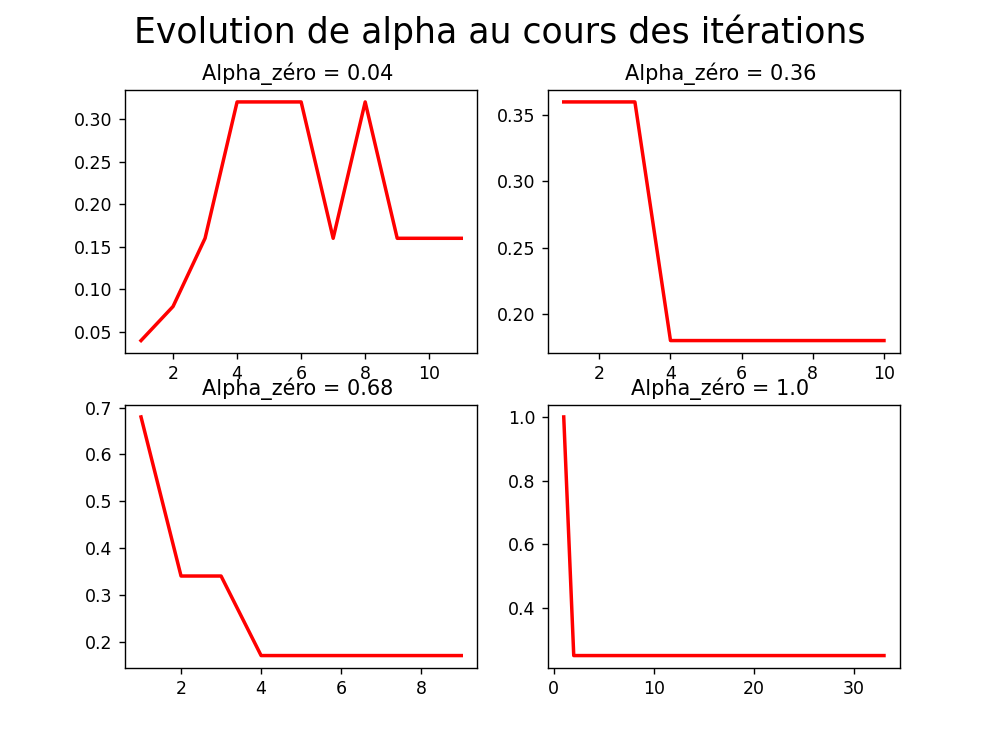

<IPython.core.display.Javascript object>


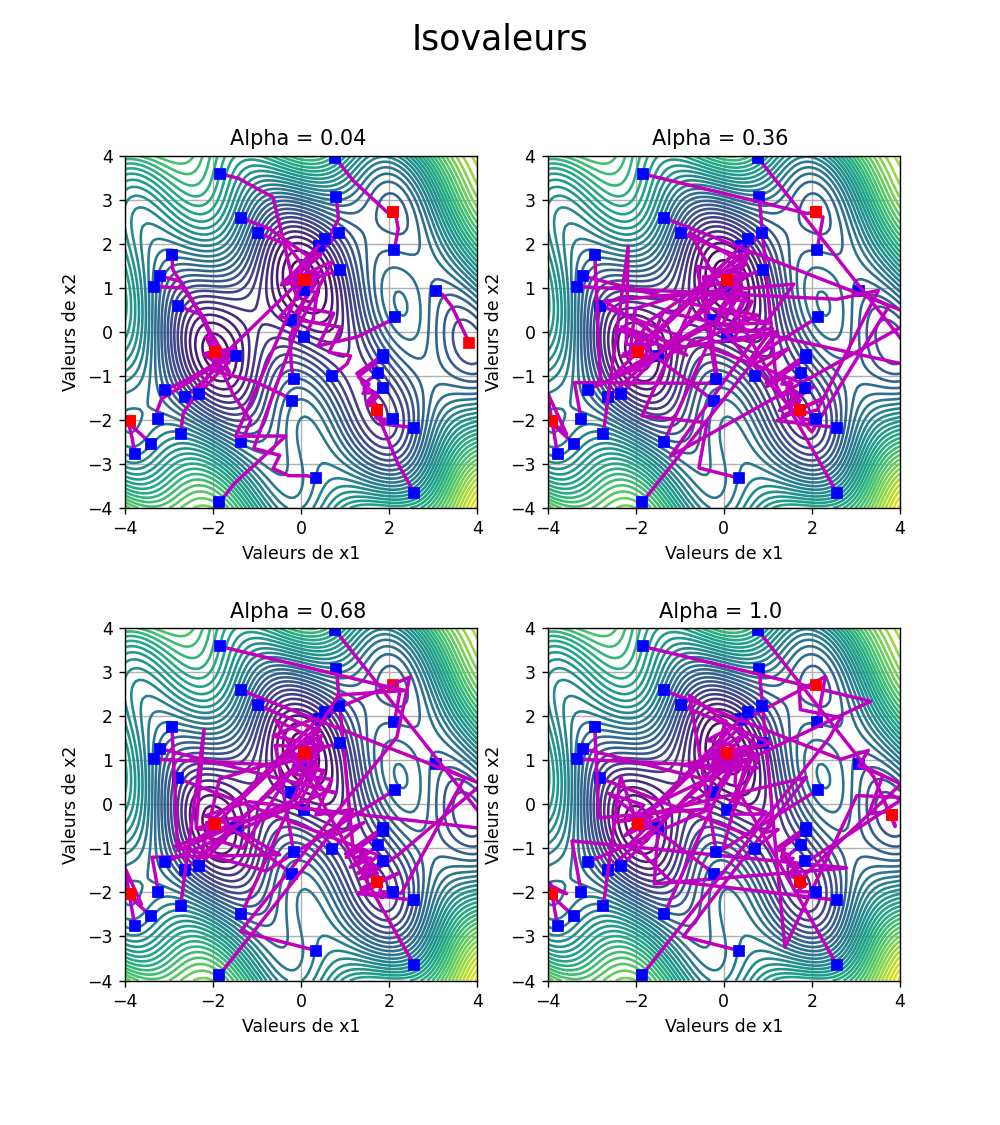

---------------   Calcul pour alpha = 0.04  ------------------
Gradient Descent  à converger 40 fois /40 points de départs aléatoires

---------------   Calcul pour alpha = 0.36  ------------------
Gradient Descent  à converger 40 fois /40 points de départs aléatoires

---------------   Calcul pour alpha = 0.68  ------------------
Gradient Descent  à converger 40 fois /40 points de départs aléatoires

---------------   Calcul pour alpha = 1.0  ------------------
Gradient Descent  à converger 40 fois /40 points de départs aléatoires



In [117]:
#%matplotlib
nb_pointsAléatoires = 40
tab_alpha_zéro = np.linspace(0.04,1,4)
# Génération de nb_pointsAléatoires aléatoire pour le test de la fonction
TP3.afficher_AdaptativeGradient(nb_pointsAléatoires,tab_alpha_zéro)

-  L'algorithme converge  pour les  40 points differents et meme pour des valeurs alpha, qui précédemment nous causer des divergences.On peut donc à priori qualifié cette méthode comme rubuste aux changement de points de départs et de valeurs différentes d'alpha.

## Implantation de la méthode de Newton : 

La fonction suivante calcul et affiche la convergence de la méthode de newton pour plusieurs points de départs vers des points critiques différents (minimum, maximum, points selles)

<IPython.core.display.Javascript object>


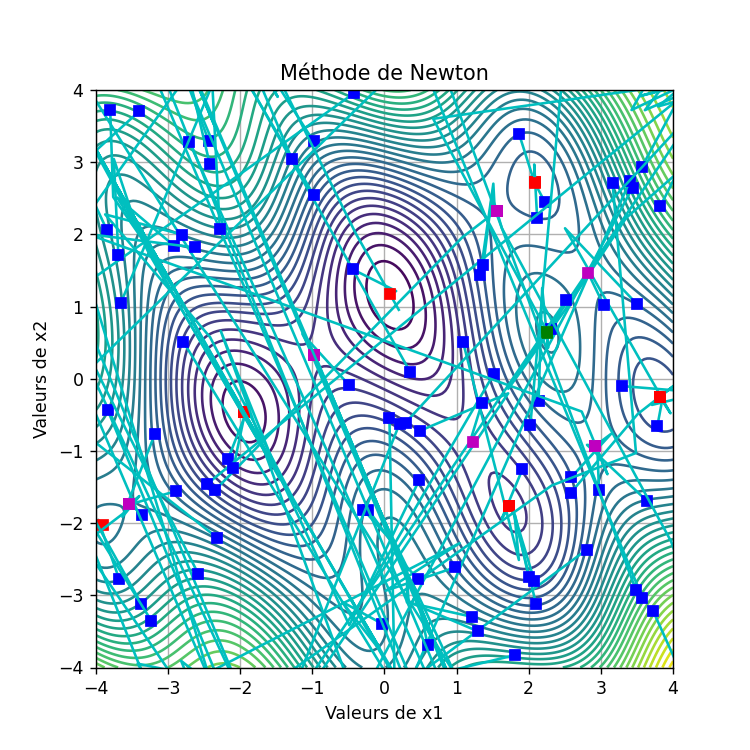

*********************************           Analyse de convergence              *********************************************

La méthode de newton à converger 41 fois /80 points de départs aléatoires

- Le nombre de convergences vers un minimum local  = 18
- Le nombre de convergences vers un maximum local  = 3
- Le nombre de convergences vers un points selles  = 20




In [108]:
cpt_point_convergant_newton = 0 # nombre de fois il y a eu convergence
cpt_minimum = 0   #nombre de fois newton a convergé vers un minimum
cpt_maximum = 0   #nombre de fois newton a convergé vers un maximum
cpt_pointSelle = 0#nombre de fois newton a convergé vers un point selle

#Randomiser les points de départs
randomlist_x1 = []
randomlist_x2 = []
for i in range(0,nb_pointsAléatoires):
    n1 = random.uniform(-4,4)
    n2 = random.uniform(-4,4)    
    randomlist_x1.append(n1)
    randomlist_x2.append(n2)
    
fig = plt.figure( figsize=(6, 6))

# Discrétisation du domaine de tracé
tab_x1  = np.linspace(-4,4,201)
tab_x2  = np.linspace(-4,4,201)
x1_2D, x2_2D = np.meshgrid(tab_x1, tab_x2)
# Tracé des isovaleurs 
nIso = 50
plt.contour(x1_2D, x2_2D, TP3.J(x1_2D, x2_2D), nIso)
plt.title('Méthode de Newton')
plt.xlabel('Valeurs de x1')
plt.ylabel('Valeurs de x2')
plt.grid()
plt.axis('square')
    
for i in range(nb_pointsAléatoires) : 

    XN, converge , n , minimum, maximum, pointSelle = TP3.newtonsNDimension(TP3.J, TP3.gradJ, TP3.hessJ, np.array([randomlist_x1[i],randomlist_x2[i]]), 1e-1, 10)
    
    #print(XN)
    if converge == True :
        cpt_point_convergant_newton += 1
        #print("Point de départ : x0 = {:.4f} , {:.4f}".format( randomlist_x1[i]  , randomlist_x2[i]) )
        if minimum == True:
            #print("Convergeance vers un MINIMUM LOCAL \nxMIN = {}, après : {} itérations\n".format(XN[-1,:], n))
            cpt_minimum+=1
        if maximum == True:
            #print("Convergeance vers un MAXIMUM LOCAL \nxMAX = {}, après : {} itérations\n".format(XN[-1,:], n))
            cpt_maximum+=1
        if pointSelle == True:
            #print("Convergeance vers un POINT SELLE \nx = {}, après : {} itérations\n".format(XN[-1,:], n))   
            cpt_pointSelle +=1
    '''
    else:
        print("Point de départ : x0 = {:.4f} , {:.4f}".format( randomlist_x1[i] , randomlist_x2[i]) )
        print("Divergeance !\n")
    '''
        
    # Tracé des segments
    x1_values = np.array(XN[:,0])
    x2_values = np.array(XN[:,1])
    plt.plot(x1_values, x2_values, 'c')
    # Tracés des points de départs et d'arrivés
    plt.plot( XN[0][0],XN[0][1],'bs')
    if (minimum == True):
        plt.plot( XN[-1][0],XN[-1][1],'rs', label = 'xmin')
    if (maximum == True):
        plt.plot( XN[-1][0],XN[-1][1],'gs', label = 'xmax')
    if (pointSelle == True):
        plt.plot( XN[-1][0],XN[-1][1],'ms', label = 'x_pointselle')
        

                     
print("*********************************           Analyse de convergence              *********************************************\n")
print("La méthode de newton à converger {} fois /{} points de départs aléatoires\n".format(cpt_point_convergant_newton, nb_pointsAléatoires))    
print("- Le nombre de convergences vers un minimum local  = {}".format(cpt_minimum))   
print("- Le nombre de convergences vers un maximum local  = {}".format(cpt_maximum)) 
print("- Le nombre de convergences vers un points selles  = {}\n\n".format(cpt_pointSelle)) 



- Marker blue  : point de départ
- Marker Rouge : minimum local
- Marker Magenta : maximum local
- Marker vert : point selle

Pour afficher chaque cas de calcul, il suffit de décommenter les instructions sur la boucle for d'affichage.

Le downside de cette méthode, c'est lorsque les puits de la fonction sont étroits, en approximant la fonction au 2 éme ordre, on peut facilement qe retrouver plus loin dans la courbe pour eventuellement diverger. Donc pour la majorité des points de départs loin des points critique, la méthode diverge.

La méthode de newton peut converger à un minimum local, maximum local ou un point selle, et en calculant les valeurs propres de propres des hessiennes de chaque solution approchée, on peut déterminer la nature de ce point de convergence.

## Solution mixte ; Descente en gradient + Newton :

<IPython.core.display.Javascript object>


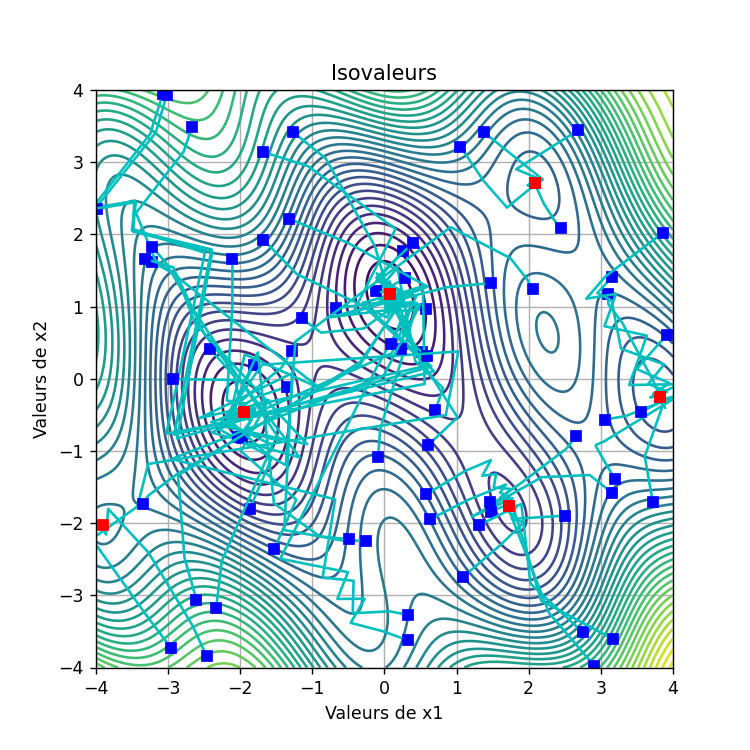

La méthode de newton à converger 70 fois /70 points de départs aléatoires
Le nombre de minimum local trouvés = 70
Le nombre de maximum local trouvés = 0
Le nombre de points selles trouvés = 0


In [119]:
nb_pointsAléatoires = 70
alpha = 0.05
epsilon1 = 1e-2
epsilon2 = 1e-1
nMax1 = 35
nMax2 = 8
TP3.afficher_solutionMixte(nb_pointsAléatoires,alpha,epsilon1, epsilon2, nMax1, nMax2)

- Marker blue  : point de départ
- Marker Rouge : minimum local
- Marker Magenta : maximum local
- Marker vert : point selle

Cette méthode nous permet d'avoir la certitude de convergence de la méthode de descente en gradient à la adaptatif, et la rapidité de la méthode de newton qui prendera le relais lorsqu'on est accés proche de la solution.

Sachant que Le pas de déplacement de la méthode de descente en gradient étant proportionnel au module du gradient, diminue automatiquement au voisinage du minimum, on peut donc dire qu'elle passe la majorité de sa vie proche du minimum pour pouvoir converger, ce qui par contre pourrai prendre seulement quelques itérations pour la méthode de newton pour converger.

